## Group Project Report: Predicting Heart Disease Using knn classification
Nethkini Liyanage - Charlotte Du - Andrew Young Liu - Vivian Khong

In [1]:
#load packages
library(tidyverse)
library(tidymodels)
library(dplyr)
library(gridExtra)

# set the seed
set.seed(1)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Introduction:
Heart disease pertains to be one of the major causes of death (1 in 5) in America and many other countries. Factors including cholesterol, blood pressure, and blood sugar levels, among many others, are critical indicators of heart disease risk and contribute to narrowing arteries and reducing blood flow to the heart, increasing the chances of heart attacks and other cardiovascular complications. Managing these levels is crucial in preventing heart disease.  Using medical equipment such as X-rays and ECGs is too costly and is not readily available to be used across the world. The “Heart Disease” dataset donated by researchers at the Department of Medicine, Veterans Administration Medical Center, Long Beach California in 1988 includes 14 attributes and a target variable indicating the presence or absence of heart disease. The dataset contains data from patient test groups from Switzerland, America, and Hungary. This project utilizes the database from Cleveland, Ohio to determine if cases of heart disease can be accurately classified using  maximum heart rate achieved during exercise (thalach), ST depression induced by exercise relative to rest (oldpeak), and number of major vessels (ca). 

## Methods & Results

### Loading Data into R

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# create readable column name tibble
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "heart_disease_presence")
# read the data into R
cleveland_data <- read.csv(url, header = FALSE,, col.names = column_names)

# view the first few rows of the data and have a glipmse
head(cleveland_data)
glimpse(cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Rows: 303
Columns: 14
$ age                    <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56,…
$ sex                    <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,…
$ cp                     <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3,…
$ trestbps               <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 14…
$ chol                   <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 20…
$ fbs                    <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,…
$ restecg                <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0,…
$ thalach                <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 15…
$ exang                  <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,…
$ oldpeak                <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.…
$ slope                  <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1,…
$ ca                     <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0"…
$ thal            

### Cleaning and Wrangling (training) data   to edit once eric response

### Convert data types

In [3]:
# convert 0 to 'no' and 1-3 to 'yes' in a new column
cleveland_data$heart_disease_presence <- ifelse(cleveland_data$heart_disease_presence == 0, 'no', 'yes')

# convert the column types
cleveland_data <- mutate(cleveland_data, ca = as.numeric(ca), 
    heart_disease_presence = as.factor(heart_disease_presence))

# see first 6 rows to check the effect
head(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,no
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,yes
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,yes
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,no
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,no
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,no


### Count the numer of rows having missing data

In [4]:
# summarize the number of observations that are "NA"
cleveland_data |>
  summarise(
    na_count = sum(rowSums(is.na(cleveland_data)))
  )

na_count
<dbl>
4


In [5]:
# delete rows contain NA
cleveland_data <- na.omit(cleveland_data)

In [6]:
# this code block needed some change waiting on TA Eric's response. Dont edit.Ty

# summarize the number of observations that are "?"
question_mark__count <- data.frame(t(colSums(cleveland_data == "?")))
question_mark__count

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,0,2,0


In [7]:
# delete these rows with "?" and "NA"
cleveland_data <- filter(cleveland_data, thal != "?", ca != "?")

### Data Split

In [8]:
# split the data to 75% training and 25% testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = heart_disease_presence)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

# show the head of the traning data
head(cleveland_train)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,no
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,no
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,no
4,57,1,4,140,192,0,0,148,0,0.4,2,0,6.0,no
5,56,0,2,140,294,0,2,153,0,1.3,2,0,3.0,no
6,57,1,3,150,168,0,0,174,0,1.6,1,0,3.0,no


### Summary Tables of Class Distribution

In [9]:
# Summary table with count of observations, mean of predictors
summary_table <- cleveland_train |>
  summarise(
    Count_Yes = sum(heart_disease_presence == "yes"),
    Count_No = sum(heart_disease_presence == "no"),
    Mean_trestbps = mean(trestbps),
    Mean_thalach = mean(thalach),
    Mean_oldpeak = mean(oldpeak),
    Mean_chol = mean(chol),
    Mean_ca = mean(ca),
  )

# To view the table
summary_matrix <- as.matrix(summary_table)
summary_matrix

Count_Yes,Count_No,Mean_trestbps,Mean_thalach,Mean_oldpeak,Mean_chol,Mean_ca
102,120,132.3604,149.6216,1.058108,246.8649,0.6666667


### Visualizations of Potential Predictor Variables

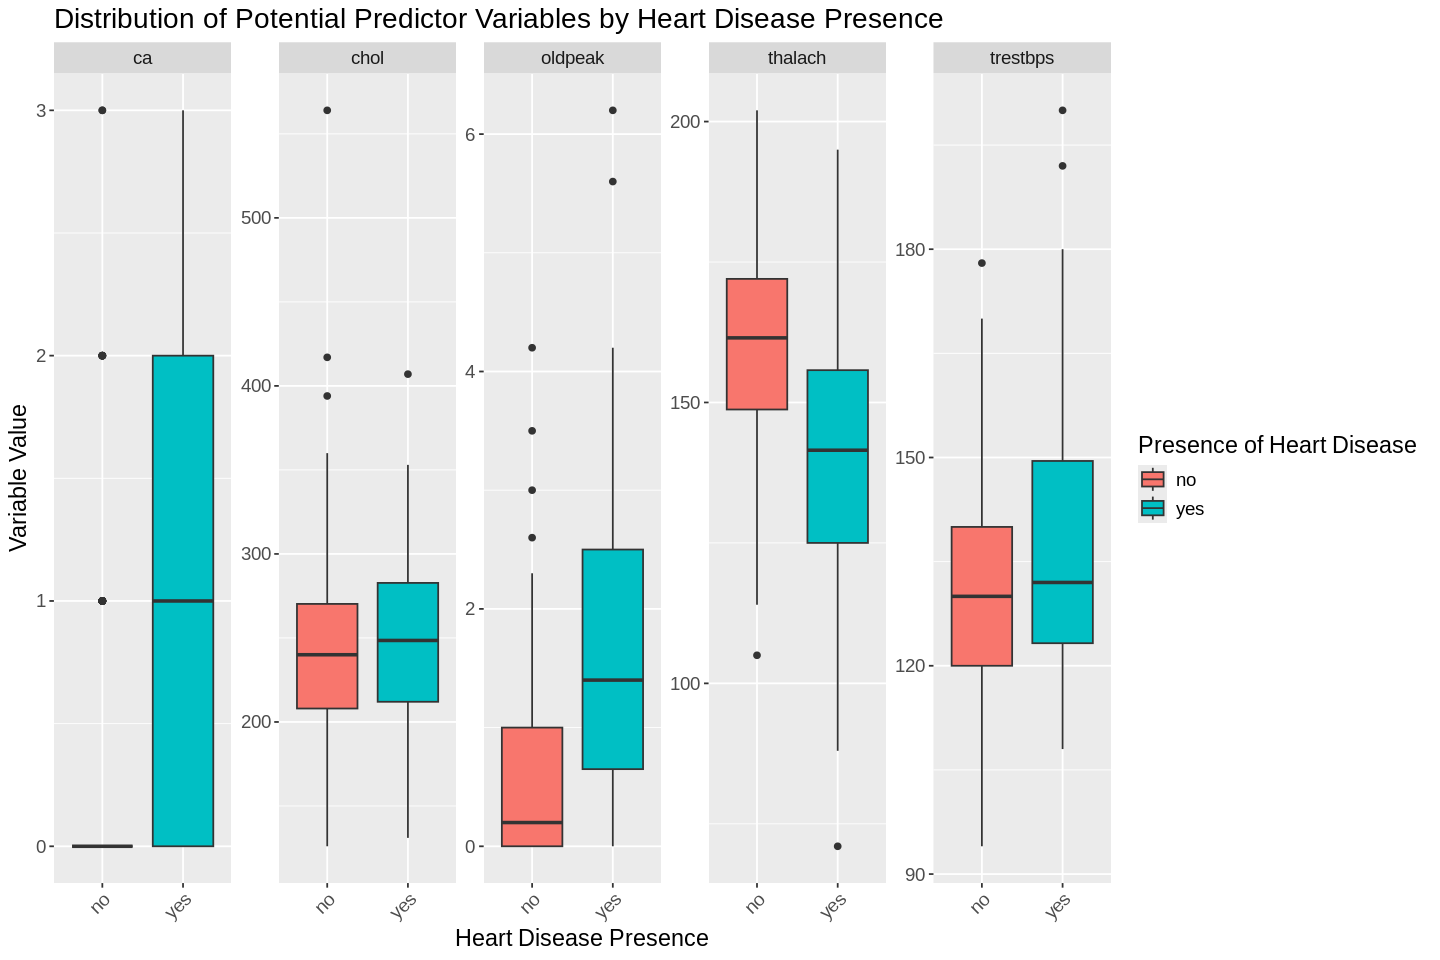

In [10]:
# box plots visualization of the data
options(repr.plot.width=12, repr.plot.height=8)

long_data <- cleveland_train |>
  pivot_longer(cols = c(trestbps, thalach, oldpeak, chol, ca), names_to = "variable", values_to = "value")

ggplot(long_data, aes(x = heart_disease_presence, y = value, fill = heart_disease_presence)) +
  geom_boxplot() +
  facet_wrap(~variable, scales = 'free', ncol = 5) +
  labs(x = "Heart Disease Presence", y = "Variable Value", fill = "Presence of Heart Disease", title = "Distribution of Potential Predictor Variables by Heart Disease Presence") +
  theme(text = element_text(size = 14), axis.text.x = element_text(angle = 45, hjust = 1))

## Classification Data Analysis

### Predictors Selection and its Reasoning

By observing the barplots side by side, we decided that the variables 'ca,' 'oldpeak,' and 'thalach' will be selected as predictors for further analysis, as they exhibit statistically significant variation in the boxplot and are unlikely due to sampling variability when comparing different categories of heart condition presence.

### Preprocess the data

In [11]:
# scale and center data
cleveland_recipe <- recipe(heart_disease_presence ~ ca + chol + oldpeak, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

### Tuning the classifier

In [12]:
# create K-nearest neighbor model specification with tune
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# 5-fold cross-validation
cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = heart_disease_presence)

# create a Ks' data frame from 1 to 20
grid_vals <- tibble(neighbors = seq(1, 20))

# workflow analysis combines recipe and model
knn__results <- workflow() |>
  add_recipe(cleveland_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = cleveland_vfold, grid = grid_vals) |>
  collect_metrics()

### Print Accuracies for ALL Ks

In [13]:
accuracy_results <- knn__results |> 
  filter(.metric == "accuracy")
accuracy_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7117172,5,0.02052855,Preprocessor1_Model01
2,accuracy,binary,0.7252525,5,0.01281774,Preprocessor1_Model02
3,accuracy,binary,0.7253535,5,0.03117205,Preprocessor1_Model03
4,accuracy,binary,0.7253535,5,0.03117205,Preprocessor1_Model04
5,accuracy,binary,0.7747475,5,0.02367766,Preprocessor1_Model05
6,accuracy,binary,0.7747475,5,0.02367766,Preprocessor1_Model06
7,accuracy,binary,0.7705051,5,0.03091247,Preprocessor1_Model07
8,accuracy,binary,0.7705051,5,0.03091247,Preprocessor1_Model08
9,accuracy,binary,0.7389899,5,0.02844578,Preprocessor1_Model09


### Ploting the Accuracy vs k

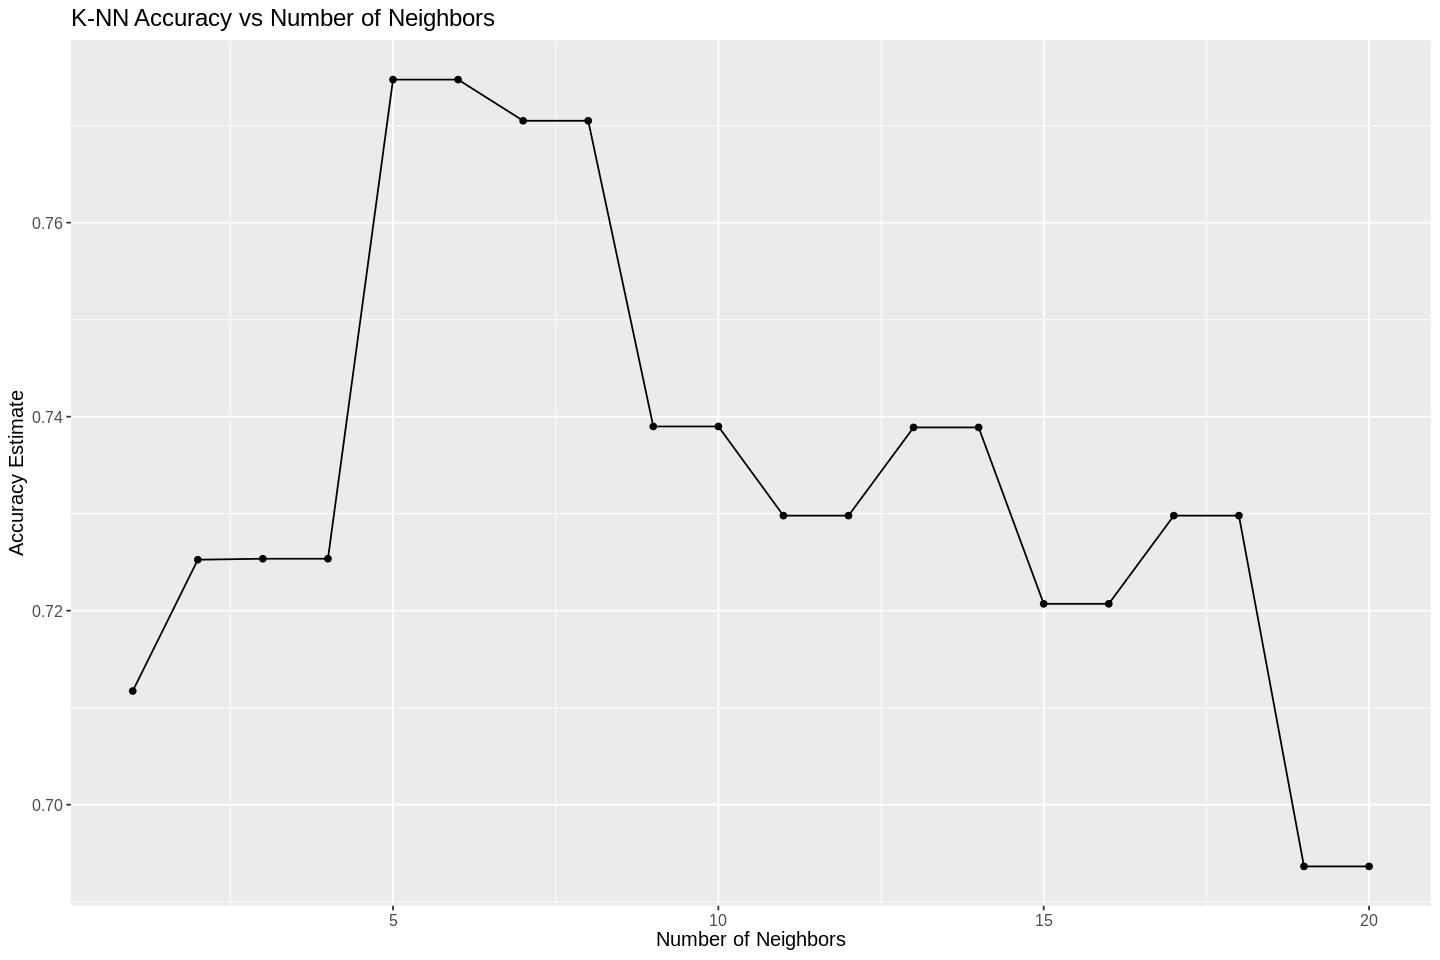

In [14]:
accuracy_plot <- ggplot(accuracy_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors", y = "Accuracy Estimate", title = "K-NN Accuracy vs Number of Neighbors") +
  theme(text = element_text(size = 12))
accuracy_plot

### Obtain the Number of Neighbours with the Highest Accuracy

In [15]:
best_k <- accuracy_results |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_k

[1] 5

### Retrain the Classifier with the Best K

In [16]:
# reconstruct the model with the best k
best_k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

best_k_recipe <- recipe(heart_disease_presence ~ ca + chol + oldpeak, data = cleveland_train) |>
     step_scale(all_predictors()) |>
    step_center(all_predictors())

best_knn_fit <- workflow() |>
  add_recipe(best_k_recipe) |>
  add_model(best_k_spec) |>
  fit(data = cleveland_train)

### Make Predictions

In [17]:
# predict on the test set
cleveland_test_predictions <- predict(best_knn_fit, cleveland_test) |>
  bind_cols(cleveland_test)
head(cleveland_test_predictions)

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
no,56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,no
yes,62,0,4,140,268,0,2,160,0,3.6,3,2,3.0,yes
no,57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,no
no,44,1,2,120,263,0,0,173,0,0.0,1,0,7.0,no
no,52,1,3,172,199,1,0,162,0,0.5,1,0,7.0,no
no,54,1,4,140,239,0,0,160,0,1.2,1,0,3.0,no


### Evaluate the Performance of the Best K

- Accuracy

In [18]:
cleveland_accuracy <- cleveland_test_predictions |>
    metrics(truth = heart_disease_presence, estimate = .pred_class) |>
    filter(.metric == "accuracy")
cleveland_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7866667


- Check the order of the labels

In [19]:
cleveland_test_predictions |> pull(heart_disease_presence) |> levels()

[1] "no"  "yes"

- Precision

In [20]:
cleveland_pre <- cleveland_test_predictions |>
  precision(truth = heart_disease_presence, estimate = .pred_class, event_level = "second")
cleveland_pre

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8518519


- Recall

In [21]:
cleveland_re <- cleveland_test_predictions |>
  recall(truth = heart_disease_presence, estimate = .pred_class,event_level = "second")
cleveland_re

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6571429


- Confusion Matrix

In [25]:
cleveland_con <- cleveland_test_predictions |>
  conf_mat(truth = heart_disease_presence, estimate = .pred_class)
cleveland_con

          Truth
Prediction no yes
       no  36  12
       yes  4  23

- Summary

In [ ]:
combined_metrics <- bind_rows(cleveland_accuracy, cleveland_pre, cleveland_re)
combined_metrics

In [ ]:
# this visulization need to be changed to something else
conf_bar <- ggplot(combined_metrics, aes(x = .metric, y = .estimate, fill = .metric)) +
  geom_bar(stat = "identity",width = 0.5) +
  labs(x = '', y = 'Percentage', title = 'Model Performance Metrics') +
  ylim(0, 1) +  
  theme_minimal() +
  theme(legend.position = "none")
conf_bar

## Methods:
The goal of this project is to build a model that can predict whether or not a patient has heart disease.
The model will use the K-nearest neighbors classification algorithm, as it is the most suitable method for the task; our data contains many variables, and we are trying to sort patients into two distinct categories. 

The data contains many variables, and not all of them can be used in the classification. The most relevant data can be characterized by:
- Being in numeric form (some categorical data could work)
- Moderate to strong correlations with heart disease

Additionally, as the model is being made to reduce the need for medical tests, variables that can be measured using simple and minimally invasive procedures are favoured (but this is not a priority).
To determine which variables should be prioritized, scatter plots between different variables can be used to find correlation strengths. 

We will use the K-nearest neighbors algorithm to analyze our data. Based on the preliminary data analysis, the data must be standardized and centered. Then, to determine the appropriate K value for our model, we will use cross-validation. To evaluate the performance of our model, we can use a confusion matrix and calculate the accuracy, precision and recall.
~~Additionally, to account for the fact that diseases behave differently in male and female bodies, we will make bar graphs to determine variability between sexes, and do some data analysis separated by sex.~~ ***we didn't do this in our analysis*** :(



## Expected Outcomes and Significance:

Elevated serum cholesterol heightens the risk of arterial plaque buildup, impeding blood flow and increasing the risk of clot formation. Elevated blood pressure impairs vessel elasticity, diminishing blood flow and augmenting heart disease susceptibility, manifesting as chest pain. Consequently, we anticipate finding relationships/ correlations between our 5 predictor variables and the presence or absence of heart disease. It is likely that factors like high serum cholesterol levels, resting blood pressure, and maximum heart rate achieved during exercise correlate positively with heart disease. This study harbours the potential for a cost-effective heart disease classification alternative. Furthermore, mitigating factors contributing to elevated serum cholesterol and blood pressure can enhance preventive measures against heart disease. Future inquiries could explore the interplay of various factors in heart disease diagnosis. For instance, “Are there specific age ranges where certain predictor variables exhibit a stronger association with the presence of heart disease?” and “Is there a sex difference where certain predictor variables exhibit a stronger association with the presence of heart disease?”


## Discussion  
  * Utilizing the methods of loading data into R, cleaning, wrangling and processing the publicly available heart-disease data donated by researchers at the Department of Medicine, Veterans Administration Medical Center, Long Beach California in 1988, this study created a model to predict whether or not a patient has heart disease using the K-nearest neighbour classification algorithm. This model uses the variables 'ca', 'oldpeak', and 'thalach', as predictors as they displayed statistically significant variation in the boxplots that were created in the prior steps. Using these variables, the data was processed and used to create a k-nearest neighbour model specification with tune. After printing the accuracies for all k values, a plot of K vs accuracy was created to determine that k=5 was the best K value. Lastly, the model was retrained using k=5, and the testing data was used to determine the accuracy, precision, and recall of this model.
  * The trained model with k=5 demonstrated an accuracy of 0.7866667 which indicates that this model correctly predicts the presence or absence of heart disease for approximately 78.67% of the cases in our dataset. Further, a precision of 0.8518519 means that when this model predicts a patient has heart disease, it is correct about 85.19% of the time. Additionally, a recall of 0.6571429 means that our model correctly identifies 65.71% of the patients who actually have heart disease. Overall, this model shows decent overall accuracy in predicting heart disease presence or absence, and it has a moderate ability to correctly identify individuals with heart disease. However, it also indicates that there is room for improvement in accuracy,precision and recall, (especially since it is vital that predictions of heart disease or lack there of be accurate, precise, and have a high recall when informing pateints) suggesting that further optimization or refinement of the model may be beneficial to enhance its performance.
  * These results are a relatively accurate reflection of what was expected to be found since we were using publicly available data and only focused on Cleaveland. The accuracy, precision, and recall scores are decent scores for a first model and in the future, to expand and improve this model, further analysis can be conducted, perhaps using a larger data set (beyond just Cleaveland).
  * The findings of this model have several implications including clinical utility, patient care, and an overall positive impact on public health. The basis of this model can be used to aid with preliminary diagnosis of heart disease, thereby increasing methods of preventitive care and potentially decreasing death rates. Additionally, the finding from this model can lead to a lower cost of medical examinations as medical scans such as MRIs, FMIRs, ECG..etc. are qute coslty. Using this model as a predictor fo heart disease can thefore lead to a less medical expenses for patients.
  * The findings of this model also opens doors to many areas of expansion and lead to additianal questions. One pertanat question is "are there ways to further optimize the K-nearest neighbors algorithm parameters to improve model performance?", Further, we can ask, "can the predictive accuracy of this model be enhanced by including more predictor variables?" We can also conduct studies to explore a variety of questions incliding variability between sexes. Lastly, longitudinal studies can also be conducted to assess the model's performance over time. 


## References
1. Heart Disease Dataset UCI Machine Learning Repository. (n.d.). Retrieved from https://archive.ics.uci.edu/dataset/45/heart+disease
2. Heart Disease - Symptoms and Causes - Mayo Clinic. (2022, August 25). Retrieved from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(congenital%20heart%20defects)
3. Heart disease and stroke prevention. (n.d.). Retrieved from https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,Americans%20have%20a%20heart%20attack.